In [26]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor

In [2]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

## Linear Regression on Case Data

In [407]:
url = 'https://raw.githubusercontent.com/sdguerrette/capstone_project/db11b24ce11d1fa4ff46bade64e6050b6cf766ed/modified_data/merged_cleaned.csv'

In [408]:
# Read data for modeling into a data frame from CSV file
covid_df = pd.read_csv(url)
covid_df

,FIPS,3/31/21,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,...,Gender Equality,Hopefulness,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic
0,1001.0,6589,594.443459,55200.0,23315.0,21115.0,8422.0,1065.0,29372.0,4204.0,...,77.063492,91.163142,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952
1,1003.0,20505,1589.793007,208107.0,111945.0,78622.0,21653.0,4343.0,31203.0,14310.0,...,69.016011,82.484017,28069.0,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246
2,1005.0,2227,885.001636,25782.0,11937.0,9186.0,6597.0,918.0,18461.0,4901.0,...,69.323158,61.927181,17249.0,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105
3,1007.0,2542,622.461089,22527.0,9161.0,6840.0,2863.0,658.0,20199.0,2650.0,...,68.844059,85.258871,18988.0,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677
4,1009.0,6444,644.830460,57645.0,24222.0,20600.0,8220.0,909.0,22656.0,7861.0,...,64.585114,79.492703,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,56037.0,4022,10426.975725,44117.0,19628.0,15871.0,5237.0,1213.0,32624.0,2549.0,...,68.112161,82.403142,30945.0,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334
3074,56039.0,3609,3996.844622,23059.0,13680.0,9158.0,1619.0,210.0,53703.0,958.0,...,70.618318,84.036899,46499.0,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645
3075,56041.0,2128,2081.719807,20609.0,8972.0,7735.0,2552.0,614.0,27009.0,934.0,...,71.058477,84.089095,25636.0,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391
3076,56043.0,891,2238.672972,8129.0,3868.0,3422.0,984.0,253.0,27556.0,590.0,...,67.383553,87.485019,26325.0,76.249370,77.658224,67.412774,82.820701,78.925326,74.628788,70.050103


In [409]:
# Drop Social Context fields
covid_df.drop(columns=['Gender Equality', 'Hopefulness', 'Income Per Capita', 'Neuroticism','Openness','Religiosity','Risk Taking', 'Selflessness', 'Tolerance', 'Work Ethic'], axis=1, inplace=True)

In [410]:
covid_df.set_index('FIPS', drop=True, inplace=True)

In [411]:
#Drop fields with low correlation - keep percent fields for regression

covid_df.drop(columns=['AREA_SQMI','E_HH','E_HU','EP_POV','E_MOBILE','E_NOVEH', 'EP_UNEMP', 'E_PCI','EP_PCI','EP_NOHSDP',
       'EP_AGE65','EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_MINRTY', 'EP_LIMENG',
       'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EPL_POV',
       'EPL_UNEMP', 'EPL_PCI', 'EPL_NOHSDP', 'SPL_THEME1', 'RPL_THEME1',
       'EPL_AGE65', 'EPL_AGE17', 'EPL_DISABL', 'EPL_SNGPNT', 'SPL_THEME2',
       'RPL_THEME2', 'EPL_MINRTY', 'EPL_LIMENG', 'SPL_THEME3', 'RPL_THEME3',
       'EPL_MUNIT', 'EPL_MOBILE', 'EPL_CROWD', 'EPL_NOVEH', 'EPL_GROUPQ',
       'SPL_THEME4', 'RPL_THEME4', 'SPL_THEMES', 'RPL_THEMES', 'F_POV',
       'F_UNEMP', 'F_PCI', 'F_NOHSDP', 'F_THEME1', 'F_AGE65', 'F_AGE17',
       'F_DISABL', 'F_SNGPNT', 'F_THEME2', 'F_MINRTY', 'F_LIMENG', 'F_THEME3',
       'F_MUNIT', 'F_MOBILE', 'F_CROWD', 'F_NOVEH', 'F_GROUPQ', 'F_THEME4','E_DAYPOP', 'Agreeableness',
       'Belief In Science', 'Collectivism', 'Conflict Awareness',
       'Conscientiousness', 'Empathy', 'Employment Rate', 'Entrepreneurship',
       'Extraversion','EP_UNINSUR','F_TOTAL'], axis=1, inplace=True)

In [412]:
covid_df

,3/31/21,E_TOTPOP,E_POV,E_UNEMP,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_CROWD,E_GROUPQ,E_UNINSUR
FIPS,,,,,,,,,,,,,,,
1001.0,6589,55200.0,8422.0,1065.0,4204.0,8050.0,13369.0,10465.0,1586.0,13788.0,426.0,886.0,299.0,546.0,3875.0
1003.0,20505,208107.0,21653.0,4343.0,14310.0,40665.0,45677.0,28863.0,4508.0,35339.0,1068.0,20492.0,991.0,3014.0,20864.0
1005.0,2227,25782.0,6597.0,918.0,4901.0,4634.0,5436.0,5078.0,1174.0,13884.0,398.0,152.0,313.0,2900.0,2558.0
1007.0,2542,22527.0,2863.0,658.0,2650.0,3661.0,4659.0,3412.0,407.0,5726.0,57.0,222.0,52.0,2091.0,1619.0
1009.0,6444,57645.0,8220.0,909.0,7861.0,10233.0,13468.0,8114.0,1437.0,7413.0,934.0,211.0,339.0,543.0,6303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037.0,4022,44117.0,5237.0,1213.0,2549.0,4721.0,11809.0,5408.0,1594.0,9010.0,669.0,1076.0,308.0,578.0,5240.0
56039.0,3609,23059.0,1619.0,210.0,958.0,3135.0,4434.0,1609.0,584.0,4246.0,945.0,1020.0,658.0,924.0,2305.0
56041.0,2128,20609.0,2552.0,614.0,934.0,2498.0,6071.0,3505.0,527.0,2567.0,133.0,516.0,219.0,263.0,2499.0


In [413]:
covid_df['3/31/21'].describe()

count    3.078000e+03
mean     9.526123e+03
std      3.444794e+04
min      0.000000e+00
25%      9.862500e+02
50%      2.429500e+03
75%      6.167750e+03
max      1.219614e+06
Name: 3/31/21, dtype: float64

In [414]:
#Drop counties with zero cases and very high numbers...about 5% of counties...

covid_df = covid_df.loc[covid_df['3/31/21']<100000]
covid_df = covid_df.loc[covid_df['3/31/21']>0]
covid_df.shape

(3015, 15)

In [415]:
# Check correlations of data prior to regression
corr_matrix = covid_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,3/31/21,E_TOTPOP,E_POV,E_UNEMP,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_CROWD,E_GROUPQ,E_UNINSUR
3/31/21,1.000000,0.948923,0.909391,0.933947,0.905127,0.907985,0.957881,0.928948,0.947972,0.853239,0.746958,0.787983,0.754616,0.772003,0.878060
E_TOTPOP,0.948923,1.000000,0.924347,0.973890,0.916478,0.965795,0.990093,0.972334,0.967921,0.904268,0.778173,0.880263,0.832541,0.803168,0.868507
E_POV,0.909391,0.924347,1.000000,0.946578,0.946812,0.885710,0.923900,0.948006,0.961091,0.894619,0.780908,0.805774,0.819549,0.795135,0.905219
E_UNEMP,0.933947,0.973890,0.946578,1.000000,0.931497,0.938360,0.963913,0.967748,0.975709,0.918129,0.781775,0.852665,0.820248,0.808189,0.857099
E_NOHSDP,0.905127,0.916478,0.946812,0.931497,1.000000,0.879002,0.922875,0.918050,0.925612,0.927770,0.893679,0.780993,0.896107,0.738047,0.906989
E_AGE65,0.907985,0.965795,0.885710,0.938360,0.879002,1.000000,0.935625,0.971612,0.925121,0.828743,0.708634,0.835506,0.768422,0.775854,0.815841
E_AGE17,0.957881,0.990093,0.923900,0.963913,0.922875,0.935625,1.000000,0.955299,0.967393,0.911450,0.789640,0.839921,0.835485,0.768872,0.891039
E_DISABL,0.928948,0.972334,0.948006,0.967748,0.918050,0.971612,0.955299,1.000000,0.969847,0.856821,0.716689,0.825645,0.783905,0.802492,0.853847
E_SNGPNT,0.947972,0.967921,0.961091,0.975709,0.925612,0.925121,0.967393,0.969847,1.000000,0.896540,0.742491,0.831765,0.783423,0.799081,0.882257
E_MINRTY,0.853239,0.904268,0.894619,0.918129,0.927770,0.828743,0.911450,0.856821,0.896540,1.000000,0.890323,0.844512,0.917372,0.722700,0.879123


In [416]:
# Scale the data for regression
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(covid_df), columns=covid_df.columns)
scaled_df

,3/31/21,E_TOTPOP,E_POV,E_UNEMP,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_CROWD,E_GROUPQ,E_UNINSUR
0,-0.031072,-0.146877,-0.097577,-0.243784,-0.151197,-0.187881,-0.120657,0.014195,-0.191383,-0.150213,-0.201171,-0.212432,-0.207933,-0.393627,-0.200532
1,1.006991,0.830614,0.567056,0.460144,0.716139,1.211102,0.785244,1.045967,0.373868,0.147143,-0.123511,1.437802,0.116108,0.215475,0.991532
2,-0.356455,-0.334938,-0.189253,-0.275351,-0.091378,-0.334406,-0.343094,-0.287912,-0.271083,-0.148888,-0.204558,-0.274213,-0.201377,0.187340,-0.292942
3,-0.332958,-0.355746,-0.376823,-0.331184,-0.284567,-0.376142,-0.364881,-0.381342,-0.419457,-0.261450,-0.245808,-0.268321,-0.323595,-0.012321,-0.358829
4,-0.041888,-0.131247,-0.107724,-0.277284,0.162661,-0.094244,-0.117881,-0.117651,-0.220207,-0.238173,-0.139720,-0.269247,-0.189203,-0.394367,-0.030167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,-0.222557,-0.217728,-0.257570,-0.212002,-0.293236,-0.330675,-0.164398,-0.269405,-0.189836,-0.216138,-0.171776,-0.196440,-0.203719,-0.385729,-0.104754
3011,-0.253365,-0.352345,-0.439313,-0.427389,-0.429781,-0.398704,-0.371190,-0.482455,-0.385217,-0.281871,-0.138389,-0.201154,-0.039825,-0.300337,-0.310694
3012,-0.363840,-0.368007,-0.392445,-0.340633,-0.431841,-0.426028,-0.325289,-0.376126,-0.396243,-0.305037,-0.236614,-0.243575,-0.245395,-0.463471,-0.297082
3013,-0.456114,-0.447789,-0.471211,-0.418155,-0.461365,-0.460857,-0.441064,-0.506346,-0.451569,-0.320270,-0.249679,-0.283388,-0.319849,-0.487411,-0.386615


In [417]:
# Drop target values from dataframe
scaled_df.drop(columns=['3/31/21'], axis=1,inplace=True)
scaled_df

,E_TOTPOP,E_POV,E_UNEMP,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_CROWD,E_GROUPQ,E_UNINSUR
0,-0.146877,-0.097577,-0.243784,-0.151197,-0.187881,-0.120657,0.014195,-0.191383,-0.150213,-0.201171,-0.212432,-0.207933,-0.393627,-0.200532
1,0.830614,0.567056,0.460144,0.716139,1.211102,0.785244,1.045967,0.373868,0.147143,-0.123511,1.437802,0.116108,0.215475,0.991532
2,-0.334938,-0.189253,-0.275351,-0.091378,-0.334406,-0.343094,-0.287912,-0.271083,-0.148888,-0.204558,-0.274213,-0.201377,0.187340,-0.292942
3,-0.355746,-0.376823,-0.331184,-0.284567,-0.376142,-0.364881,-0.381342,-0.419457,-0.261450,-0.245808,-0.268321,-0.323595,-0.012321,-0.358829
4,-0.131247,-0.107724,-0.277284,0.162661,-0.094244,-0.117881,-0.117651,-0.220207,-0.238173,-0.139720,-0.269247,-0.189203,-0.394367,-0.030167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,-0.217728,-0.257570,-0.212002,-0.293236,-0.330675,-0.164398,-0.269405,-0.189836,-0.216138,-0.171776,-0.196440,-0.203719,-0.385729,-0.104754
3011,-0.352345,-0.439313,-0.427389,-0.429781,-0.398704,-0.371190,-0.482455,-0.385217,-0.281871,-0.138389,-0.201154,-0.039825,-0.300337,-0.310694
3012,-0.368007,-0.392445,-0.340633,-0.431841,-0.426028,-0.325289,-0.376126,-0.396243,-0.305037,-0.236614,-0.243575,-0.245395,-0.463471,-0.297082
3013,-0.447789,-0.471211,-0.418155,-0.461365,-0.460857,-0.441064,-0.506346,-0.451569,-0.320270,-0.249679,-0.283388,-0.319849,-0.487411,-0.386615


In [418]:
# set targets 
y = np.log(covid_df['3/31/21'])
X = scaled_df

In [419]:
# split data for trainging and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [420]:
#import regression model
from sklearn.linear_model import LinearRegression
# create the model
LR = LinearRegression()
# fit and train
LR.fit(X_train, Y_train)

LinearRegression()

In [421]:
y_prediction = LR.predict(X_test)


In [422]:
y_test.describe()

count    905.000000
mean       7.741743
std        1.444909
min        2.197225
25%        6.831954
50%        7.707962
75%        8.588024
max       11.505286
Name: 3/31/21, dtype: float64

In [423]:
y_act = np.exp(y_test)
y_pred = np.exp(y_prediction)

<AxesSubplot:>

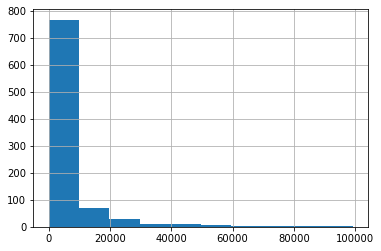

In [424]:
y_act.hist()

In [438]:
#import r2 score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


# Score and print results of model evaluation

print('r2 score is', r2_score(y_test,y_prediction))
print ('Mean Squared Error is ==' ,mean_squared_error(y_test,y_prediction))
print('Root Mean Squared Error is==',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Mean Absolute Percentage Error =',mean_absolute_percentage_error(y_test, y_prediction))
print('Y intercept is ==',LR.intercept_)

r2 score is 0.563632196724785
Mean Squared Error is == 0.9100257406995442
Root Mean Squared Error is== 0.9539526931140476
Mean Absolute Percentage Error = 0.10410784781360333
Y intercept is == 7.822481801284223


In [426]:
print(LR.coef_)

[ 1.61872665e+00 -5.58831531e-02 -2.52583221e-01  1.21333809e+00
 -4.61106183e-01 -1.22725363e-03  6.28771178e-02 -3.91628797e-01
 -7.60217994e-01 -6.15986163e-01 -3.96249809e-01  1.95107794e-01
  3.47471533e-01  4.15654206e-01]


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

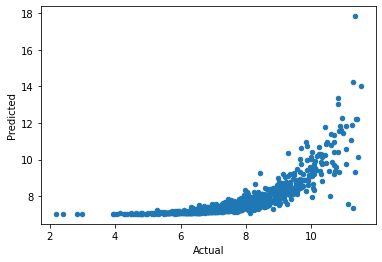

In [428]:
#Plot Actual vs Predict - natural log scale

y_values.plot.scatter(x='Actual', y='Predicted')

In [431]:
mse = np.exp(mean_squared_error(y_test,y_prediction))
mse

2.484386482407762